# Life in Plastic - Reproducible Version

# 1. Setup

In [6]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.animation import FuncAnimation, FFMpegWriter, PillowWriter
import os


# 2. Simulated dataset (2020–2090 projection)


In [7]:
years = np.arange(2020, 2091)
n = len(years)

# Synthetic trend data (example)
total_plastic = 80 * (1.04 ** np.arange(n))       #total plastic index
brand_plastic = 1.2 * (1.03 ** np.arange(n))      #brand index


# 3. Create figure (clean circular metaphor)


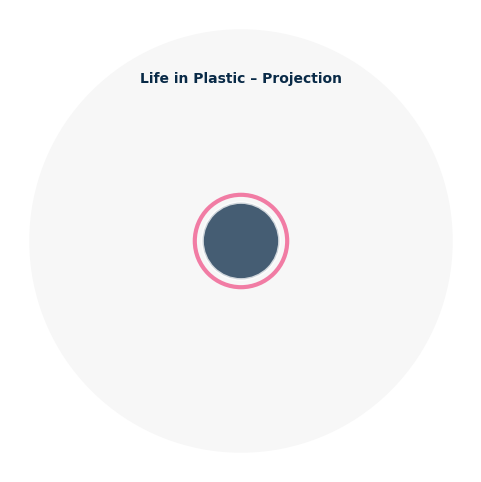

In [28]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect("equal")
ax.set_xlim(-60, 60)
ax.set_ylim(-60, 60)
ax.axis("off")

#Base patch
bg = Circle((0, 0), radius=55, facecolor="#f7f7f7", edgecolor="none")
ax.add_patch(bg)

#Dynamic circles
total_circle = Circle((0, 0), radius=10, facecolor="#092a47", alpha=0.75, edgecolor="white", lw=2)
brand_ring = Circle((0, 0), radius=12, facecolor="none", edgecolor="#f16f9b", lw=3, alpha=0.9)
ax.add_patch(total_circle)
ax.add_patch(brand_ring)

#Text
title_text = ax.text(0, 42, "Life in Plastic – Projection", ha="center", va="center",
                     fontsize=10, color="#092a47", weight="bold")
year_text = ax.text(0, 30, "", ha="center", va="center", fontsize=10, color="#092a47")
metric_text = ax.text(0, -45, "", ha="center", va="center", fontsize=8, color="#333333")



# 4. Helper scaling

In [29]:
def scale_radius(x, lo, hi):
    lo_r, hi_r = 10, 45
    return lo_r + (hi_r - lo_r) * ((x - lo) / (hi - lo + 1e-9))

min_tot, max_tot = total_plastic.min(), total_plastic.max()
min_br,  max_br  = brand_plastic.min(), brand_plastic.max()



# 5. Animation function


In [30]:
def animate(i):
    r_total = scale_radius(total_plastic[i], min_tot, max_tot)
    r_brand = scale_radius(brand_plastic[i], min_br, max_br) * 1.05
    total_circle.set_radius(r_total)
    brand_ring.set_radius(r_brand)
    year_text.set_text(f"Year: {years[i]}")
    metric_text.set_text(f"Total Index: {total_plastic[i]:.1f} | Brand Index: {brand_plastic[i]:.2f}")
    if years[i] > 2080:
        total_circle.set_alpha(0.6 + 0.2 * np.sin(i / 3))
    return total_circle, brand_ring, year_text, metric_text

anim = FuncAnimation(fig, animate, frames=n, interval=80, blit=False)


# 6. Safe save (FFmpeg → fallback Pillow)


In [31]:
mp4_path = "reports/figures/life_in_plastic.mp4"
gif_path = "reports/figures/life_in_plastic.gif"

try:
    writer = FFMpegWriter(fps=12, metadata=dict(artist="Hebifou"))
    anim.save(mp4_path, writer=writer, dpi=150)
    print(f"Animation saved as MP4: {mp4_path}")
except Exception as e:
    print("FFmpeg not available, saving GIF instead. Details:", e)
    writer = PillowWriter(fps=12)
    anim.save(gif_path, writer=writer)
    print(f"Animation saved as GIF: {gif_path}")

Animation saved as MP4: reports/figures/life_in_plastic.mp4


# 7. Save two static frames for README

In [32]:
def save_frame(fig, frame_idx, path):
    anim._draw_next_frame(frame_idx, blit=False)
    fig.savefig(path, dpi=300, bbox_inches="tight")

save_frame(fig, 0, "reports/figures/life_in_plastic_start.png")
save_frame(fig, len(years) - 1, "reports/figures/life_in_plastic_end.png")
print("Saved static frames for README.")

plt.close(fig)

Saved static frames for README.
